In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Filtering a signal with convolution
Let's start with a simple step signal (left) which we'll add some noise to (right).

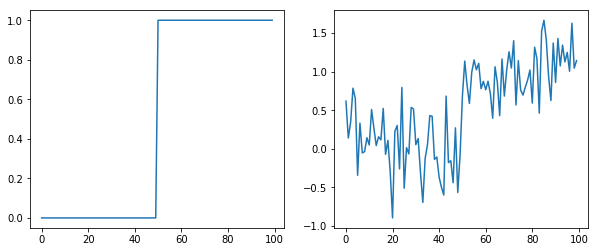

In [2]:
step_signal = np.zeros(100)
step_signal[50:] = 1
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(step_signal)

# Create random signal
np.random.seed(0) # Set the "seed" for randomness

noisy_signal = (step_signal + np.random.normal(0, 0.35, step_signal.shape))
ax[1].plot(noisy_signal)

plt.show()

If our goal is to cover something that looks more like the image on the left, we can **smooth** the signal. In the first line below, we'll take each point and average it by one datapoint to the left and one datapoint to the right, discarding the ends of the signal, where we can't do this operation.

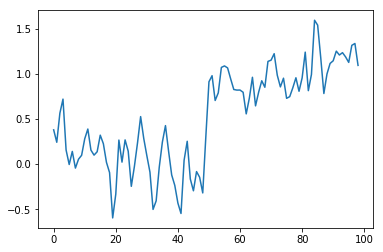

In [3]:
# Take the mean of neighboring datapoints
smooth_signal = (noisy_signal[:-1] + noisy_signal[1:]) / 2.0

plt.plot(smooth_signal)
plt.show()

Above, we're only averaging by one datapoint on each side. What if we average by 3 datapoints? Below, we'll do the following:
1. Create an output array called `smooth_signal3`, of the same length as noisy_signal.
2. At each element in `smooth_signal3` starting at point 1, and ending at point -2, place the average of the sum of: 1/3 of the element to the left of it in noisy_signal, 1/3 of the element at the same position, and 1/3 of the element to the right.
3. Discard the leftmost and rightmost elements.

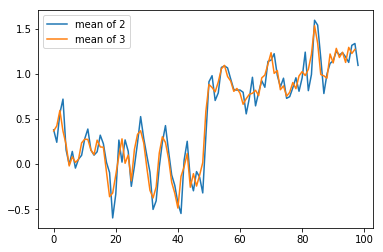

In [5]:
# Generate our signal
smooth_signal3 = (noisy_signal[:-2] + noisy_signal[1:-1] + noisy_signal[2:]) / 3

plt.plot(smooth_signal, label='mean of 2')
plt.plot(smooth_signal3, label='mean of 3')
plt.legend(loc='upper left')
plt.show()

If we want to continue this, the first line of our code is going to continue to get longer, and there isn't a straightforward way to make this flexible for how many points we want to average. Thankfully, there's a name for what we're doing: **convolving**. This same concept, nearest-neighbor averages, can be expressed as a **convolution with an averaging kernel**.

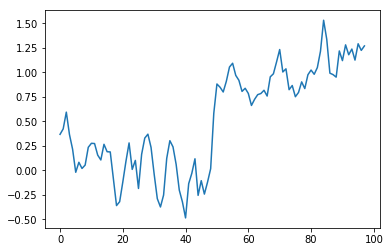

In [15]:
# Same as above, using a convolution kernel
# Neighboring pixels multiplied by 1/3 and summed

# Create the "kernel". For 3, this creates an array that looks like [0.333,0.333,0.333]
mean_kernel3 = np.full((3,), 1/3)

# Smooth the signal by convolving it
smooth_signal3p = np.convolve(noisy_signal, mean_kernel3, mode='valid')

plt.plot(smooth_signal3p)
plt.show()

In [11]:
# Check that they're equal!
print('smooth_signal3 and smooth_signal3p are equal:',
      np.allclose(smooth_signal3, smooth_signal3p))

smooth_signal3 and smooth_signal3p are equal: True


> **Task**: What happens if we convolve with a kernel of size 10? Also, do these arrays have the same # of data points? If not, why?

## About this notebook
* Several of the exercises in this notebook are based on [this tutorial](https://jni.github.io/i2k-skimage-napari/lectures/1_image_filters.html#local-filtering).